# Preparing

In [1]:
import pandas as pd
import json
import ast
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#from wordcloud import WordCloud
import re

# loading the data

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head()

,ID,Note,json
0,1,**Clinical Notes**\n\n**Patient Information:**...,"{""patient_info"": {""age"": 41, ""gender"": ""Male""}..."
1,2,Clinical Notes:\n\nPatient: 56-year-old male\n...,"{""patient_info"": {""age"": 56, ""gender"": ""Male""}..."
2,3,Clinical Notes:\n\nPatient: 73-year-old female...,"{""patient_info"": {""age"": 73, ""gender"": ""Female..."
3,4,**Clinical Notes**\n\n**Patient Information:**...,"{""patient_info"": {""age"": 32, ""gender"": ""Female..."
4,5,"**Clinical Notes**\n\n**Patient:** Male, age 5...","{""patient_info"": {""age"": 51, ""gender"": ""Male""}..."


In [4]:
train["Note"][100:150]

100    Clinical Notes:\n\nPatient: 49-year-old male\n...
101    **Clinical Notes**\n\n**Patient Information:**...
102    **Clinical Notes**\n\nPatient, a 36-year-old m...
103    **Clinical Notes**\n\n**Patient Information:**...
104    **Clinical Notes:**\n\n**Patient Information:*...
105    **Clinical Notes**\n\n**Patient Information:**...
106    **Clinical Notes**\n\n**Patient Information:**...
107    **Clinical Notes**\n\nPatient [ID] (59 years o...
108    **Clinical Notes:**\n\n**Patient Information:*...
109    **Clinical Notes**\n\n**Patient Information:**...
110    **Clinical Notes**\n\nThe patient, an 98-year-...
111    **Clinical Notes**\n\n**Patient Information:**...
112    Clinical Notes:\n\nPatient Information:\n- Age...
113    **Clinical Notes:**\n\n**Patient Information:*...
114    **Clinical Notes:**\n\n**Patient Information:*...
115    **Clinical Notes:**\n\n**Patient Information:*...
116    **Clinical Notes**\n\n**Patient Information:**...
117    **Clinical Notes**\n\n**

In [5]:
test.head()

,ID,Note
0,10823,**Clinical Notes**\n\n**Patient Information:**...
1,10824,**Clinical Notes**\n\n**Patient Information:**...
2,10825,Clinical Note:\n\nPatient: 71-year-old male\nC...
3,10826,**Clinical Notes**\n\n**Patient Information:**...
4,10827,**Clinical Notes**\n\n**Patient Information:**...


In [6]:
print("Train size: ", len(train))
print("Test size: ", len(test))

Train size:  10822
Test size:  3796


**Checking out what an example note and JSON looks like**

In [7]:
print(train["Note"][0])

**Clinical Notes**

**Patient Information:**
- Age: 41 years old
- Gender: Male

**Visit Motivation:** Anemia evaluation

**Chief Complaints and Symptoms:**
The patient presents with complaints of anemia, fever, fatigue, difficulty breathing (dyspnea), vomiting, dizziness, blurred vision, wheezing, and pale skin. The patient reports that these symptoms have been progressively worsening over the past few weeks.

**History of Present Illness:**
- **Fever**: Intermittent low-grade fevers for approximately 2 weeks.
- **Fatigue**: Persistent and severe fatigue affecting daily activities.
- **Difficulty Breathing (Dyspnea)**: Experiencing shortness of breath, particularly with exertion. No history of chronic respiratory conditions.
- **Vomiting**: Occasional episodes of non-bilious vomiting for the past week.
- **Dizziness**: Episodes of dizziness, especially upon standing, which can be severe enough to cause near-fainting spells.
- **Blurred Vision**: New onset of blurred vision, with occas

In [8]:
json.loads(train["json"][0])

{'patient_info': {'age': 41, 'gender': 'Male'},
 'visit_motivation': 'Anemia',
 'symptoms': ['fever',
  'fatigue',
  'difficulty_breathing',
  'vomiting',
  'dizziness',
  'blurred_vision',
  'wheezing',
  'pale_skin'],
 'vital_signs': {'heart_rate': {'value': 114, 'unit': 'bpm'},
  'oxygen_saturation': {'value': 98.4, 'unit': '%'},
  'cholesterol_level': {'value': 132.8, 'unit': 'mg/dL'},
  'glucose_level': {'value': 110.6, 'unit': 'mg/dL'}}}

## vital signs column

In [ ]:
# Convert JSON strings to dictionaries
train['json'] = train['json'].apply(ast.literal_eval)

# Extract the 'vital_signs' into a new column
train['vital_signs'] = train['json'].apply(lambda x: x.get('vital_signs'))

In [16]:
train

,ID,Note,json,vital_signs
0,1,**Clinical Notes**\n\n**Patient Information:**...,"{'patient_info': {'age': 41, 'gender': 'Male'}...","{'heart_rate': {'value': 114, 'unit': 'bpm'}, ..."
1,2,Clinical Notes:\n\nPatient: 56-year-old male\n...,"{'patient_info': {'age': 56, 'gender': 'Male'}...","{'temperature': {'value': 36.6, 'unit': '°C'},..."
2,3,Clinical Notes:\n\nPatient: 73-year-old female...,"{'patient_info': {'age': 73, 'gender': 'Female...","{'heart_rate': {'value': 92, 'unit': 'bpm'}, '..."
3,4,**Clinical Notes**\n\n**Patient Information:**...,"{'patient_info': {'age': 32, 'gender': 'Female...","{'blood_pressure': {'systolic': {'value': 97, ..."
4,5,"**Clinical Notes**\n\n**Patient:** Male, age 5...","{'patient_info': {'age': 51, 'gender': 'Male'}...","{'blood_pressure': {'systolic': {'value': 92, ..."
...,...,...,...,...
10817,10818,**Clinical Notes**\n\n**Patient Information:**...,"{'patient_info': {'age': 52, 'gender': 'Female...","{'temperature': {'value': 37.4, 'unit': '°C'},..."
10818,10819,**Clinical Notes**\n\n**Patient Information:**...,"{'patient_info': {'age': 17, 'gender': 'Male'}...","{'temperature': {'value': 37.0, 'unit': '°C'},..."
10819,10820,Clinical Notes:\n\nPatient Profile:\nThe patie...,"{'patient_info': {'age': 36, 'gender': 'Female...","{'temperature': {'value': 36.9, 'unit': '°C'},..."
10820,10821,**Clinical Notes**\n\n**Patient Information:**...,"{'patient_info': {'age': 21, 'gender': 'Female...","{'blood_pressure': {'systolic': {'value': 111,..."


## add json columns

In [12]:
# Parse the JSON column
extracted_json = train['json'].apply(json.loads)

# Create new columns from the parsed JSON
json_fields_df = pd.json_normalize(extracted_json)

# Concatenate the original structured_structured_dataFrame with the new fields
train_data = pd.concat([train, json_fields_df], axis=1)

In [13]:
json_fields_df.head()

,visit_motivation,symptoms,patient_info.age,patient_info.gender,vital_signs.heart_rate.value,vital_signs.heart_rate.unit,vital_signs.oxygen_saturation.value,vital_signs.oxygen_saturation.unit,vital_signs.cholesterol_level.value,vital_signs.cholesterol_level.unit,vital_signs.glucose_level.value,vital_signs.glucose_level.unit,vital_signs.temperature.value,vital_signs.temperature.unit,vital_signs.respiratory_rate.value,vital_signs.respiratory_rate.unit,vital_signs.blood_pressure.systolic.value,vital_signs.blood_pressure.systolic.unit,vital_signs.blood_pressure.diastolic.value,vital_signs.blood_pressure.diastolic.unit
0,Anemia,"[fever, fatigue, difficulty_breathing, vomitin...",41,Male,114.0,bpm,98.4,%,132.8,mg/dL,110.6,mg/dL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allergies,"[runny_nose, sneezing, itchy_eyes, blurred_vis...",56,Male,NaN,NaN,NaN,NaN,NaN,NaN,99.0,mg/dL,36.6,°C,13.0,breaths/min,NaN,NaN,NaN,NaN
2,Diabetes (Type 2),"[fever, headache, difficulty_breathing, chest_...",73,Female,92.0,bpm,NaN,NaN,173.0,mg/dL,224.8,mg/dL,NaN,NaN,18.0,breaths/min,NaN,NaN,NaN,NaN
3,Allergies,"[fatigue, abdominal_pain, runny_nose, rash, jo...",32,Female,70.0,bpm,98.2,%,NaN,NaN,139.8,mg/dL,36.9,°C,19.0,breaths/min,97.0,mmHg,79.0,mmHg
4,Tuberculosis (TB),"[fever, cough, nausea, joint_pain, sneezing, f...",51,Male,NaN,NaN,NaN,NaN,125.7,mg/dL,70.7,mg/dL,NaN,NaN,19.0,breaths/min,92.0,mmHg,74.0,mmHg


In [14]:
#Resulting normalized columns for analysis
print(train_data.columns)

Index(['ID', 'Note', 'json', 'visit_motivation', 'symptoms',
       'patient_info.age', 'patient_info.gender',
       'vital_signs.heart_rate.value', 'vital_signs.heart_rate.unit',
       'vital_signs.oxygen_saturation.value',
       'vital_signs.oxygen_saturation.unit',
       'vital_signs.cholesterol_level.value',
       'vital_signs.cholesterol_level.unit', 'vital_signs.glucose_level.value',
       'vital_signs.glucose_level.unit', 'vital_signs.temperature.value',
       'vital_signs.temperature.unit', 'vital_signs.respiratory_rate.value',
       'vital_signs.respiratory_rate.unit',
       'vital_signs.blood_pressure.systolic.value',
       'vital_signs.blood_pressure.systolic.unit',
       'vital_signs.blood_pressure.diastolic.value',
       'vital_signs.blood_pressure.diastolic.unit'],
      dtype='object')


In [15]:
column_rename_map = {
    'visit_motivation':'visit motivation',
    'patient_info.age': 'age',
    'patient_info.gender': 'gender',
    'vital_signs.heart_rate.value': 'heart rate value',
    'vital_signs.heart_rate.unit': 'heart rate unit',
    'vital_signs.oxygen_saturation.value': 'oxygen saturation value',
    'vital_signs.oxygen_saturation.unit': 'oxygen saturation unit',
    'vital_signs.cholesterol_level.value': 'cholesterol level value',
    'vital_signs.cholesterol_level.unit': 'cholesterol level unit',
    'vital_signs.glucose_level.value': 'glucose level value',
    'vital_signs.glucose_level.unit': 'glucose level unit',
    'vital_signs.temperature.value': 'temperature value',
    'vital_signs.temperature.unit': 'temperature unit',
    'vital_signs.respiratory_rate.value': 'respiratory rate value',
    'vital_signs.respiratory_rate.unit': 'respiratory rate unit',
    'vital_signs.blood_pressure.systolic.value': 'blood pressure systolic value',
    'vital_signs.blood_pressure.systolic.unit': 'blood pressure systolic unit',
    'vital_signs.blood_pressure.diastolic.value': 'blood pressure diastolic value',
    'vital_signs.blood_pressure.diastolic.unit': 'blood pressure diastolic unit'
}

train_data.rename(columns=column_rename_map, inplace=True)


In [16]:
train_data.head()

,ID,Note,json,visit motivation,symptoms,age,gender,heart rate value,heart rate unit,oxygen saturation value,...,glucose level value,glucose level unit,temperature value,temperature unit,respiratory rate value,respiratory rate unit,blood pressure systolic value,blood pressure systolic unit,blood pressure diastolic value,blood pressure diastolic unit
0,1,**Clinical Notes**\n\n**Patient Information:**...,"{""patient_info"": {""age"": 41, ""gender"": ""Male""}...",Anemia,"[fever, fatigue, difficulty_breathing, vomitin...",41,Male,114.0,bpm,98.4,...,110.6,mg/dL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Clinical Notes:\n\nPatient: 56-year-old male\n...,"{""patient_info"": {""age"": 56, ""gender"": ""Male""}...",Allergies,"[runny_nose, sneezing, itchy_eyes, blurred_vis...",56,Male,NaN,NaN,NaN,...,99.0,mg/dL,36.6,°C,13.0,breaths/min,NaN,NaN,NaN,NaN
2,3,Clinical Notes:\n\nPatient: 73-year-old female...,"{""patient_info"": {""age"": 73, ""gender"": ""Female...",Diabetes (Type 2),"[fever, headache, difficulty_breathing, chest_...",73,Female,92.0,bpm,NaN,...,224.8,mg/dL,NaN,NaN,18.0,breaths/min,NaN,NaN,NaN,NaN
3,4,**Clinical Notes**\n\n**Patient Information:**...,"{""patient_info"": {""age"": 32, ""gender"": ""Female...",Allergies,"[fatigue, abdominal_pain, runny_nose, rash, jo...",32,Female,70.0,bpm,98.2,...,139.8,mg/dL,36.9,°C,19.0,breaths/min,97.0,mmHg,79.0,mmHg
4,5,"**Clinical Notes**\n\n**Patient:** Male, age 5...","{""patient_info"": {""age"": 51, ""gender"": ""Male""}...",Tuberculosis (TB),"[fever, cough, nausea, joint_pain, sneezing, f...",51,Male,NaN,NaN,NaN,...,70.7,mg/dL,NaN,NaN,19.0,breaths/min,92.0,mmHg,74.0,mmHg


Number of rows and columns

In [17]:
print(f"Dataset Shape: {train_data.shape}")

Dataset Shape: (10822, 23)


## Data Types

In [18]:
print("Data Types:\n", train_data.dtypes)

Data Types:
 ID                                  int64
Note                               object
json                               object
visit motivation                   object
symptoms                           object
age                                 int64
gender                             object
heart rate value                  float64
heart rate unit                    object
oxygen saturation value           float64
oxygen saturation unit             object
cholesterol level value           float64
cholesterol level unit             object
glucose level value               float64
glucose level unit                 object
temperature value                 float64
temperature unit                   object
respiratory rate value            float64
respiratory rate unit              object
blood pressure systolic value     float64
blood pressure systolic unit       object
blood pressure diastolic value    float64
blood pressure diastolic unit      object
dtype: object


In [19]:
for column in [col for col in train_data.columns if 'unit' in col]:
    print(f"Unique values in {column}: {train_data[column].unique()}")

Unique values in heart rate unit: ['bpm' nan]
Unique values in oxygen saturation unit: ['%' nan]
Unique values in cholesterol level unit: ['mg/dL' nan]
Unique values in glucose level unit: ['mg/dL' nan]
Unique values in temperature unit: [nan '°C']
Unique values in respiratory rate unit: [nan 'breaths/min']
Unique values in blood pressure systolic unit: [nan 'mmHg']
Unique values in blood pressure diastolic unit: [nan 'mmHg']


Change the data type of objects

In [20]:
#to string
train_data['Note'] = train_data['Note'].astype('string')
train_data['visit motivation'] = train_data['visit motivation'].astype('string')
#to list

#to category
units_columns = [
    'gender',
    'heart rate unit',
    'oxygen saturation unit',
    'cholesterol level unit',
    'glucose level unit',
    'temperature unit',
    'respiratory rate unit',
    'blood pressure systolic unit',
    'blood pressure diastolic unit'
]
for col in units_columns:
    train_data[col] = train_data[col].astype('category')


In [21]:
print(train_data.select_dtypes(include='object').columns)

Index(['json', 'symptoms'], dtype='object')


In [22]:
print(train_data.dtypes)

ID                                         int64
Note                              string[python]
json                                      object
visit motivation                  string[python]
symptoms                                  object
age                                        int64
gender                                  category
heart rate value                         float64
heart rate unit                         category
oxygen saturation value                  float64
oxygen saturation unit                  category
cholesterol level value                  float64
cholesterol level unit                  category
glucose level value                      float64
glucose level unit                      category
temperature value                        float64
temperature unit                        category
respiratory rate value                   float64
respiratory rate unit                   category
blood pressure systolic value            float64
blood pressure systo

Missing Values

In [23]:
print("Missing Values:\n", train_data.isnull().sum())

Missing Values:
 ID                                   0
Note                                 0
json                                 0
visit motivation                     0
symptoms                             0
age                                  0
gender                               0
heart rate value                  5045
heart rate unit                   5045
oxygen saturation value           5238
oxygen saturation unit            5238
cholesterol level value           5495
cholesterol level unit            5495
glucose level value               5402
glucose level unit                5402
temperature value                 4911
temperature unit                  4911
respiratory rate value            5171
respiratory rate unit             5171
blood pressure systolic value     5532
blood pressure systolic unit      5532
blood pressure diastolic value    5532
blood pressure diastolic unit     5532
dtype: int64


unique values

In [24]:
for column in train_data.columns:
    if column == 'symptoms':

        temp_column = train_data[column].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))
        unique_values = temp_column.nunique()
    else:
        unique_values = train_data[column].nunique()
    
    print(f"{column}: {unique_values} unique values")


ID: 10822 unique values
Note: 10822 unique values
json: 10822 unique values
visit motivation: 20 unique values
symptoms: 10814 unique values
age: 86 unique values
gender: 2 unique values
heart rate value: 81 unique values
heart rate unit: 1 unique values
oxygen saturation value: 142 unique values
oxygen saturation unit: 1 unique values
cholesterol level value: 751 unique values
cholesterol level unit: 1 unique values
glucose level value: 1057 unique values
glucose level unit: 1 unique values
temperature value: 32 unique values
temperature unit: 1 unique values
respiratory rate value: 19 unique values
respiratory rate unit: 1 unique values
blood pressure systolic value: 82 unique values
blood pressure systolic unit: 1 unique values
blood pressure diastolic value: 57 unique values
blood pressure diastolic unit: 1 unique values


Value Counts

In [25]:
for column in ['gender']:  
    print(f"Value Counts for {column}:\n", train_data[column].value_counts())

Value Counts for gender:
 gender
Female    5437
Male      5385
Name: count, dtype: int64


In [26]:
for column in ['visit motivation']:  
    print(f"Value Counts for {column}:\n", train_data[column].value_counts())

Value Counts for visit motivation:
 visit motivation
Urinary Tract Infection (UTI)                   598
Hypertension (High Blood Pressure)              593
Allergies                                       584
Gastroesophageal Reflux Disease (GERD)          582
Eczema (Atopic Dermatitis)                      578
Anxiety Disorders                               571
Strep Throat                                    567
Influenza (Flu)                                 559
Tuberculosis (TB)                               535
Depression                                      533
Diabetes (Type 2)                               533
Ear Infection (Otitis Media)                    533
Anemia                                          525
Heart Disease (Coronary Artery Disease)         512
Pneumonia                                       511
Sinusitis                                       510
Chronic Obstructive Pulmonary Disease (COPD)    504
Asthma                                          502
Common Cold

split train data and test data

In [27]:
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

print(f"Train data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")


Train data size: 8657
Test data size: 2165


# Data analysis

Descriptive Statistics

In [28]:
print("Descriptive Statistics:\n", train_data.describe())
# Count: عدد القيم غير المفقودة في كل عمود.
# Mean: المتوسط الحسابي للقيم في العمود.
# Std: الانحراف المعياري (يُظهر مدى تباعد القيم عن المتوسط).
# Min: القيمة الصغرى في العمود.
# 25%: الربع الأول (25% من البيانات أقل من هذه القيمة).
# 50% (Median): الوسيط (50% من البيانات أقل من هذه القيمة).
# 75%: الربع الثالث (75% من البيانات أقل من هذه القيمة).
# Max: القيمة الكبرى في العمود.

Descriptive Statistics:
                  ID          age  heart rate value  oxygen saturation value  \
count   8657.000000  8657.000000       4633.000000              4465.000000   
mean    5419.029571    48.415155         85.836175                96.292228   
std     3121.974939    23.459486         18.376265                 3.277364   
min        2.000000    15.000000         60.000000                85.000000   
25%     2699.000000    28.000000         72.000000                95.600000   
50%     5442.000000    46.000000         83.000000                97.100000   
75%     8123.000000    65.000000         95.000000                98.500000   
max    10820.000000   100.000000        140.000000               100.000000   

       cholesterol level value  glucose level value  temperature value  \
count              4283.000000          4334.000000        4726.000000   
mean                161.607074           114.546585          37.425011   
std                  21.570895           

## Charts

Distribution of Age

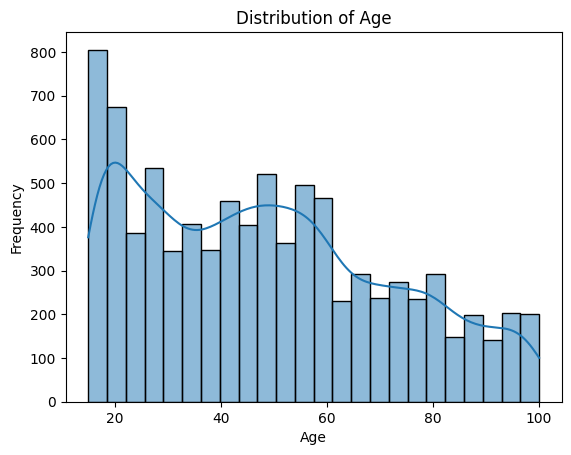

In [29]:
sns.histplot(train_data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Count the values ​​in each category

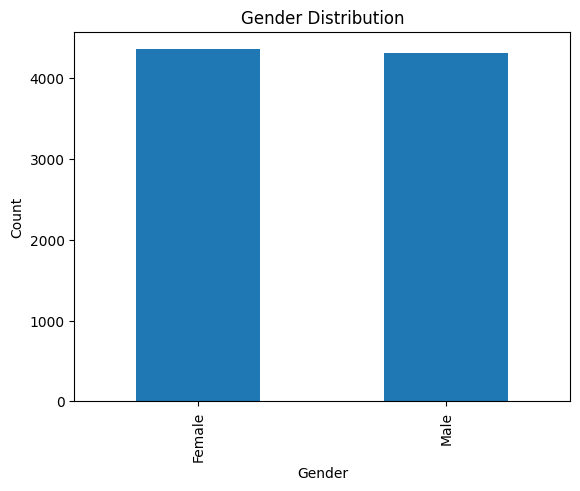

In [30]:
train_data['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

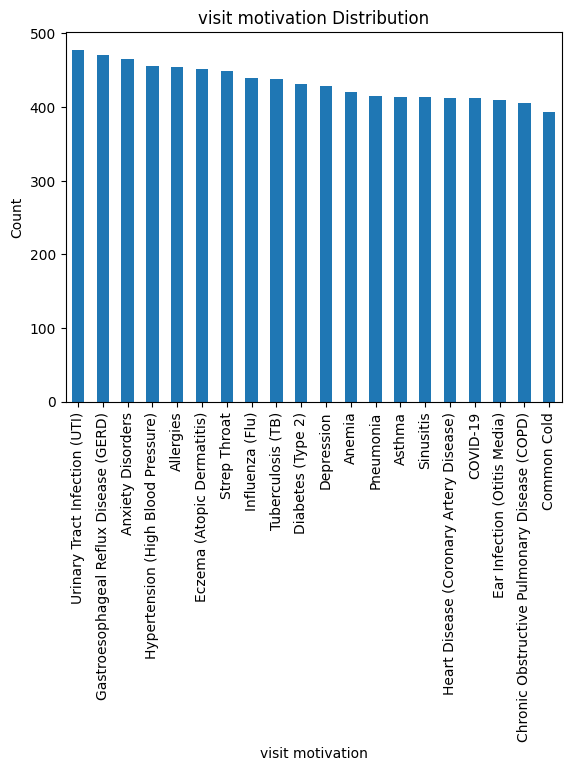

In [31]:
train_data['visit motivation'].value_counts().plot(kind='bar')
plt.title('visit motivation Distribution')
plt.xlabel('visit motivation')
plt.ylabel('Count')
plt.show()


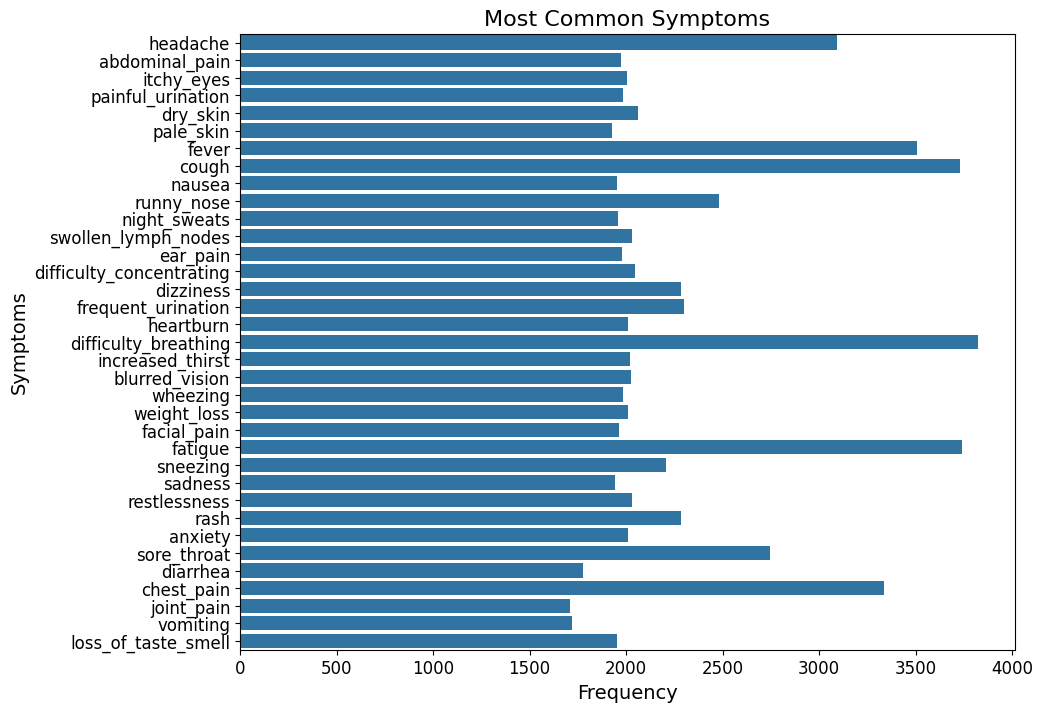

In [32]:
train_data['symptoms'] = train_data['symptoms'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

symptoms_flat = [symptom for sublist in train_data['symptoms'] if isinstance(sublist, list) for symptom in sublist]

symptom_counts = Counter(symptoms_flat)

plt.figure(figsize=(10, 8)) 
sns.barplot(x=list(symptom_counts.values()), y=list(symptom_counts.keys()))

plt.title('Most Common Symptoms', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Symptoms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


## WordCloud

In [33]:
# Collect texts from notes and json column
notes_text = " ".join(train_data['Note'].dropna())
json_text = " ".join(train_data['json'].dropna())

# Split texts into words
notes_words = notes_text.split()
json_words = json_text.split()

# Count repeated words
notes_counter = Counter(notes_words)
json_counter = Counter(json_words)

In [34]:
# Extract unique and duplicate words
unique_notes_words = set(notes_words) - set(json_words)  # notes
unique_json_words = set(json_words) - set(notes_words)  # json
common_words = set(notes_words).intersection(set(json_words))  # Common words

In [35]:
# drawing Word Cloud for all words in notes
wordcloud_notes = WordCloud(width=800, height=400, background_color='white').generate(notes_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_notes, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Notes (All Words)", fontsize=16)
plt.show()

NameError: name 'WordCloud' is not defined

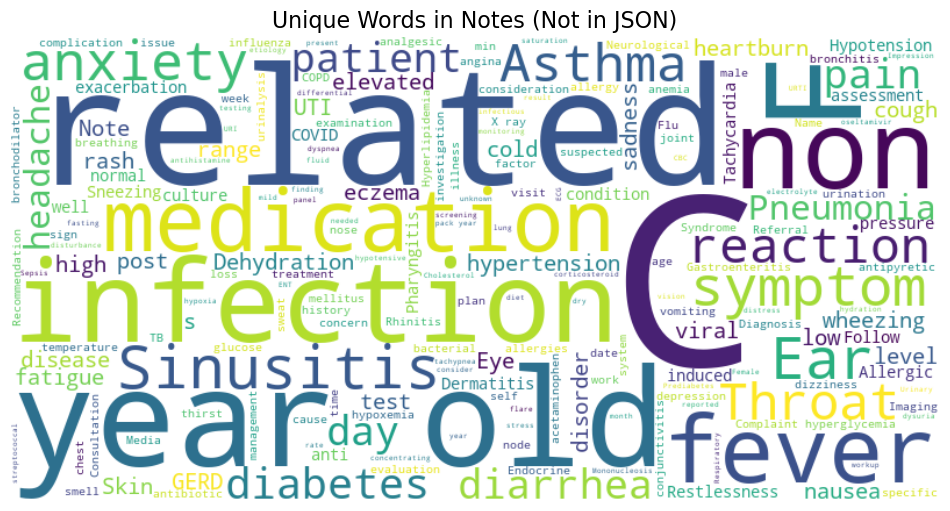

In [31]:
#drawing Word Cloud only for unique words in notes
wordcloud_unique_notes = WordCloud(width=800, height=400, background_color='white').generate(" ".join(unique_notes_words))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_unique_notes, interpolation='bilinear')
plt.axis('off')
plt.title("Unique Words in Notes (Not in JSON)", fontsize=16)
plt.show()

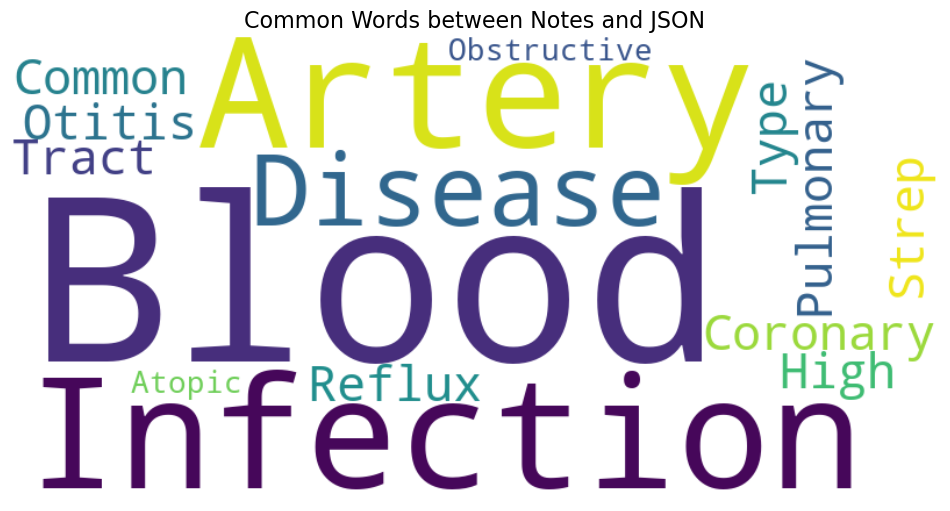

In [32]:
#drawing Word Cloud  for words shared between notes and json
wordcloud_common = WordCloud(width=800, height=400, background_color='white').generate(" ".join(common_words))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_common, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words between Notes and JSON", fontsize=16)
plt.show()


In [33]:
#Display statistics
print("Top 20 Most Common Words in Notes:")
print(notes_counter.most_common(20))

print("\nTop 20 Most Common Words in JSON:")
print(json_counter.most_common(20))

print("\nWords in Notes but not in JSON (Unique to Notes):")
print(list(unique_notes_words)[:20])

print("\nWords in JSON but not in Notes (Unique to JSON):")
print(list(unique_json_words)[:20])


Top 20 Most Common Words in Notes:
[('-', 109233), ('and', 105243), ('of', 66254), ('the', 55185), ('to', 55156), ('a', 46761), ('The', 44824), ('or', 33213), ('patient', 31384), ('for', 29983), ('with', 29291), ('symptoms', 28390), ('*', 24505), ('is', 22491), ('be', 20119), ("patient's", 19510), ('may', 13758), ('normal', 13461), ('in', 12872), ('on', 12838)]

Top 20 Most Common Words in JSON:
[('{"value":', 35329), ('"unit":', 35329), ('{"patient_info":', 8657), ('{"age":', 8657), ('"gender":', 8657), ('"visit_motivation":', 8657), ('"symptoms":', 8657), ('"vital_signs":', 8657), ('"mg/dL"}}}', 6531), ('"\\u00b0C"},', 4599), ('"Female"},', 4353), ('"bpm"},', 4331), ('"Male"},', 4304), ('"glucose_level":', 4276), ('"oxygen_saturation":', 4236), ('{"blood_pressure":', 4196), ('{"systolic":', 4196), ('"mmHg"},', 4196), ('"diastolic":', 4196), ('"cholesterol_level":', 4166)]

Words in Notes but not in JSON (Unique to Notes):
['mostly', '**Elevated', '**Nausea**,', '114/69', 'Conjunctiva

## Finding patterns

In [25]:
train_data.isna().sum()

ID                                   0
Note                                 0
json                                 0
visit motivation                     0
symptoms                             0
age                                  0
gender                               0
heart rate value                  4024
heart rate unit                   4024
oxygen saturation value           4192
oxygen saturation unit            4192
cholesterol level value           4374
cholesterol level unit            4374
glucose level value               4323
glucose level unit                4323
temperature value                 3931
temperature unit                  3931
respiratory rate value            4161
respiratory rate unit             4161
blood pressure systolic value     4461
blood pressure systolic unit      4461
blood pressure diastolic value    4461
blood pressure diastolic unit     4461
dtype: int64

In [42]:
# Function to find notes missing any age pattern
def find_missing_pattern_notes(Notes, patterns):
    """
    Identifies notes that do not match any of the expected age patterns.

    Args:
        df (pd.Dataframe): A pandas Datafram containing medical notes column.
        patterns (list): A list of regex patterns for column (age).

    Returns:
        set: A set of notes with no age pattern matches.
    """
    missed_notes = []

    for note in Notes:
        if not any(re.search(pattern, note, re.IGNORECASE) for pattern in patterns):
            missed_notes.append(note)

    return missed_notes

### age

In [43]:
age_patterns = [
    r'age[: ]+(\d+)',
    r'\*\*Age\*\*[: ]+(\d+)',
    r'\*\*Age:\*\*\s+(\d+)',
    r'\*\*Age/Gender:\*\*\s*(\d+)',
    r'(\d+)[-\s]?years?[-\s]?old',
    r'age is (\d+)',
    r'(\d+)\s*yo\b',
    r'(\d+) years?',
    r'age \(?(\d+)\)?',
    r'(\d+)[FM]',
]

In [44]:
# Find notes missing age patterns
missed_age_notes = find_missing_pattern_notes(train["Note"], age_patterns)

# Display the missed notes
print("Notes missing information count: ", len(missed_age_notes))

Notes missing information count:  9


In [45]:
missed_age_notes

["**Clinical Notes**\n\nPatient presented with a history of eczema (atopic dermatitis) and current complaints of rash, painful urination, and dry skin.\n\nVital signs:\n\n* Blood pressure: 95/76 mmHg (systolic/diastolic)\n* Heart rate: 65 bpm\n* Respiratory rate: 17 breaths/min\n* Oxygen saturation: 96.5% (normal)\n* Cholesterol level: 145.8 mg/dL (elevated)\n* Glucose level: 122.6 mg/dL (mildly elevated)\n\nNotably, the patient's blood pressure is slightly low, which may be related to the eczema. The elevated cholesterol and glucose levels suggest the presence of a metabolic component to this case.\n\nGiven the combination of symptoms and lab results, I am making a diagnosis of **eczema (atopic dermatitis) complicated by hypertension, dyslipidemia, and mild hyperglycemia**.\n\nThe patient's painful urination suggests possible urinary tract involvement or secondary infection. Further evaluation with urinalysis and possibly imaging studies may be necessary to determine the cause of this

### gender

In [46]:
gender_patterns = [
    r'\b(male|female)\b',
    r'\d+(F|M)',
]

In [47]:
# Find notes missing age patterns
missed_gender_notes = find_missing_pattern_notes(train["Note"], gender_patterns)

# Display the missed notes
print("Notes missing information count: ", len(missed_gender_notes))

Notes missing information count:  21


In [48]:
missed_gender_notes

["**Clinical Notes**\n\nPatient presents with COVID-19 symptoms, highlighting the severity of his condition. \n\nUpon examination, patient's vital signs reveal:\n\n* Blood pressure: Systolic 113/80 mmHg (mildly elevated)\n* Temperature: 38.9°C (fever indicating infection)\n* Respiratory rate: 15 breaths/min (slightly increased)\n\nSymptomatically, the patient reports:\n* Fever\n* Cough\n* Fatigue\n* Difficulty breathing (indicative of respiratory distress)\n* Abdominal pain\n* Dizziness\n* Sneezing\n* Loss of taste and smell\n* Increased thirst\n* Blurred vision\n* Painful urination\n* Dry skin\n\nNotable, the patient's age (75) and comorbidities are not explicitly documented. However, it is essential to consider potential underlying health conditions that may exacerbate his condition.\n\nConsidering these findings, a likely diagnosis of COVID-19-induced acute respiratory distress with secondary complications (e.g., hypertension, dehydration, and electrolyte imbalances) is warranted. F

### visit motivation

In [49]:
# Extract visit motivation
motivation_patterns = [
    r'visit motivation[:\-\s\n ]+([^\n\.]+)',
    # '[:\- ]+' matches one or more ':', '-', or ' ' (space).
    # '([^\n]+)' captures everything until a newline ('\n'), representing the motivation.
    r'reason for visit[:\-\s\n ]+([^\n\.]+)',
    r'\*?\*?chief complaint:?\*?\*?[:\-\s\n ]+([^\n\.]+)',
    r'presenting with[:\-\s\n ]+([^\n\.]+)',
    r'presented with[:\-\s\n ]+([^\n\.]+)',
    r'presents with[:\-\s\n ]+([^\n\.]+)',
    r'\*\*Visit Motivation:?\*\*[:\-\s\n ]+([^\n\.]+)',
]

In [50]:
# Find notes missing age patterns
missed_motivation_notes = find_missing_pattern_notes(train["Note"], motivation_patterns)

# Display the missed notes
print("Notes missing information count: ", len(missed_motivation_notes))

Notes missing information count:  162


In [51]:
missed_motivation_notes

["**Clinical Notes**\n\nPatient: [Redacted] (64 years old, Female)\n\nPresenting complaint: Diabetes Mellitus Type 2.\n\nReview of systems:\n\n* The patient reports fatigue and diarrhea in the past week. Fatigue is described as severe, worse with exertion, and affecting daily activities.\n* Joint pain is present bilaterally, more pronounced in the lower extremities.\n* Loss of taste and smell has been ongoing for several weeks, significantly impacting quality of life.\n* Increased thirst and urination have led to polyuria. The patient reports needing to urinate 5-6 times per night.\n* Blurred vision on both eyes is a recent development, started approximately 2 days prior to presentation.\n* Night sweats are frequent, occurring several times a week.\n* Painful urination has been present for the past month.\n\nVital signs:\n\n* Blood pressure: Systolic 108 mmHg, Diastolic 66 mmHg\n* Cholesterol level: 181.4 mg/dL (Elevated)\n* Glucose level: 198.9 mg/dL (Diabetic range)\n\nPhysical exami

### symptoms

In [52]:
# Extract symptoms
symptoms_patterns = [
    r'symptoms?[:\- ]+([^\n]+)',
    # 'symptoms?' matches the word "symptom" or "symptoms" (optional 's').
    # '[:\- ]+' matches one or more ':', '-', or ' '.
    # '([^\n]+)' captures everything until a newline.
    r'complaints?[:\- ]+([^\n]+)',
    r'patient reports[:\- ]+([^\n]+)',
    r'symptoms include[:\- ]+([^\n]+)',
    r'presenting with[:\- ]+([^\n]+)'
]

In [53]:
# Find notes missing age patterns
missed_symptoms_notes = find_missing_pattern_notes(train["Note"], symptoms_patterns)

# Display the missed notes
print("Notes missing information count: ", len(missed_symptoms_notes))

Notes missing information count:  31


In [54]:
missed_symptoms_notes

["**Clinical Notes**\n\nPatient presents with COVID-19 symptoms, highlighting the severity of his condition. \n\nUpon examination, patient's vital signs reveal:\n\n* Blood pressure: Systolic 113/80 mmHg (mildly elevated)\n* Temperature: 38.9°C (fever indicating infection)\n* Respiratory rate: 15 breaths/min (slightly increased)\n\nSymptomatically, the patient reports:\n* Fever\n* Cough\n* Fatigue\n* Difficulty breathing (indicative of respiratory distress)\n* Abdominal pain\n* Dizziness\n* Sneezing\n* Loss of taste and smell\n* Increased thirst\n* Blurred vision\n* Painful urination\n* Dry skin\n\nNotable, the patient's age (75) and comorbidities are not explicitly documented. However, it is essential to consider potential underlying health conditions that may exacerbate his condition.\n\nConsidering these findings, a likely diagnosis of COVID-19-induced acute respiratory distress with secondary complications (e.g., hypertension, dehydration, and electrolyte imbalances) is warranted. F

# Baseline model using regular expression

## calculate accuracy

In [55]:
"""
All columns of the solution and submission dataframes are passed to your metric, except for the Usage column.

Your metric must satisfy the following constraints:
- You must have a function named score. Kaggle's evaluation system will call that function.
- You can add your own arguments to score, but you cannot change the first three (solution, submission, and row_id_column_name).
- All arguments for score must have type annotations.
- score must return a single, finite, non-null float.
"""

import pandas as pd
import pandas.api.types
import math
import json
import numpy as np


class ParticipantVisibleError(Exception):
    # If you want an error message to be shown to participants, you must raise the error as a ParticipantVisibleError
    # All other errors will only be shown to the competition host. This helps prevent unintentional leakage of solution data.
    pass


def to_json(s):
    """
    Converts input string to JSON-like Python object, if fails returns empty string.
    
    **Returns:**
        - Python dictionary or empty string
        
    **Examples:**
    
    >>> to_json('{"a": 10, "b":12}')
    {'a': 10, 'b': 12}
    """
    try:
        s_json = json.loads(s)
    except:
        print(f'Error converting to JSON: {s}')
        s_json = ''
    
    return s_json
    
def compare_json(a, b, key_weight=0.25, value_weight=0.75, alpha=1.):
    """
    Recursively computes a similarity score between two JSON-like Python objects.

    The similarity score ranges from 0 to 1, where:
    - 1 indicates that the objects are identical.
    - 0 indicates no similarity.

    **Comparison Rules:**

    - **Numerical Values (int, float):**
      - Similarity is calculated using an exponential decay function based on the absolute difference:
        \[
        \text{Similarity} = e^{-\alpha \times |a - b|}
        \]
      - **alpha** controls the rate at which similarity decreases as the difference increases.

    - **Strings:**
      - Similarity is the proportion of matching characters at the same positions relative to the length of the longer string:
        \[
        \text{Similarity} = \frac{\text{Number of Matching Characters}}{\text{Length of Longer String}}
        \]

    - **Booleans:**
      - Similarity is 1 if both values are the same, 0 otherwise.

    - **NoneType:**
      - Similarity is 1 if both values are `None`, 0 otherwise.

    - **Different Data Types:**
      - If the types of `a` and `b` differ, the similarity is 0.

    - **Dictionaries:**
      - **Key Similarity:** Calculated as the ratio of shared keys to total unique keys.
      - **Value Similarity:** Recursively computed similarities of the values corresponding to shared keys.
      - **Combined Similarity:** Weighted sum of key similarity and value similarity:
        \[
        \text{Similarity} = (\text{key\_weight} \times \text{Key Similarity}) + (\text{value\_weight} \times \text{Value Similarity})
        \]

    - **Lists:**
      - Elements are compared recursively up to the length of the shorter list.
      - Similarity is adjusted for lists of different lengths by multiplying by the ratio of the shorter length to the longer length.

    **Parameters:**

    - **a**: The first JSON-like object to compare. Can be a `dict`, `list`, `int`, `float`, `str`, `bool`, or `None`.
    - **b**: The second JSON-like object to compare.
    - **key_weight** *(float, optional)*: Weight for the key similarity in dictionaries. Defaults to `0.25`.
    - **value_weight** *(float, optional)*: Weight for the value similarity in dictionaries. Defaults to `0.75`.
    - **alpha** *(float, optional)*: Decay rate for numerical similarity. Higher values make the similarity decrease more rapidly with increasing difference. Defaults to `1.0`.

    **Returns:**

    - **similarity** *(float)*: A float between `0` and `1` representing the similarity between the two JSON objects.

    **Examples:**

    >>> compare_json(10, 10)
    1.0

    >>> compare_json(10, 12)   # Similarity = exp(-1.0 * abs(10 - 12))
    0.1353352832366127

    >>> compare_json("hello", "hallo") # Matches at positions 0 ('h') and 2 ('l') and 1 ('o')
    0.8

    >>> compare_json(True, True)
    1.0

    >>> compare_json(None, None)
    1.0

    >>> compare_json({"a": 1, "b": 2}, {"a": 1, "b": 3})
    0.7629547904392908

    >>> compare_json([1, 2, 3], [1, 2, 4])
    0.6666666666666666

    **Notes:**

    - The function is designed to handle nested structures and will recursively compare elements within dictionaries and lists.
    - Adjusting the `key_weight` and `value_weight` allows you to prioritize matching keys over matching values in dictionaries.
    - The `alpha` parameter allows tuning how quickly the similarity decreases for numerical differences; a higher `alpha` means that even small differences lead to low similarity.

    **Usage Tips:**

    - Ensure that the input objects are JSON-serializable Python data types.
    - For best results, pre-process your data to handle any special types or structures not covered by this function.

    **Limitations:**

    - The function does not handle custom objects or data types outside of standard JSON types.
    - For large and deeply nested structures, the function may have performance considerations due to recursion depth.

    """
    # Base case for numerical values
    if isinstance(a, (int, float)) and isinstance(b, (int, float)):
        abs_diff = abs(a - b)
        similarity = math.exp(-alpha * abs_diff)
        return similarity

    # Base case for strings
    elif isinstance(a, str) and isinstance(b, str):
        max_len = max(len(a), len(b))
        if max_len == 0:
            return 1.  # Both strings are empty
        match_count = sum(1 for c1, c2 in zip(a, b) if c1 == c2)
        similarity = match_count / max_len
        return similarity

    # Base case for booleans
    elif isinstance(a, bool) and isinstance(b, bool):
        return 1. if a == b else 0.

    # Base case for None
    elif a is None and b is None:
        return 1.

    # Different types
    elif type(a) != type(b):
        return 0.

    # Recursive case for dictionaries
    elif isinstance(a, dict) and isinstance(b, dict):
        keys_a = set(a.keys())
        keys_b = set(b.keys())
        all_keys = keys_a | keys_b
        if not all_keys:
            return 1.  # Both dicts are empty

        key_similarity = len(keys_a & keys_b) / len(all_keys)

        value_similarities = []
        for key in all_keys:
            if key in a and key in b:
                sim = compare_json(a[key], b[key], key_weight, value_weight, alpha)
                value_similarities.append(sim)
            else:
                value_similarities.append(0)

        value_similarity = sum(value_similarities) / len(value_similarities)

        # Combined similarity
        similarity = key_weight * key_similarity + value_weight * value_similarity
        return similarity

    # Recursive case for lists
    elif isinstance(a, list) and isinstance(b, list):
        a = set(a)
        b = set(b)
        mutual_items = a & b
        len_a = len(a)
        len_b = len(b)
        max_len = max(len_a, len_b)
        if max_len == 0:
            return 1.  # Both lists are empty
        else:
            return len(mutual_items) / max_len
    else:
        return 0.  # Unsupported data types or mismatch


def score(solution: pd.DataFrame, submission: pd.DataFrame, row_id_column_name: str) -> float:
    '''
    Computes the average similarity score between two DataFrames containing JSON-like data.

    This function compares corresponding JSON objects in the `solution` and `submission` DataFrames row by row and column by column. It calculates a similarity score for each pair of JSON objects and returns the overall average similarity score ranging from 0 to 1.

    **Parameters:**

    - **solution** *(pd.DataFrame)*: The DataFrame containing the ground truth JSON objects.
    - **submission** *(pd.DataFrame)*: The DataFrame containing the submitted JSON objects to be evaluated.
    - **row_id_column_name** *(str)*: The name of the column used as the row identifier, which will be removed before computation.

    **Returns:**

    - **float**: The average similarity score between the `solution` and `submission` DataFrames.
    
    Example:
    >>> import pandas as pd
    >>> row_id_column_name = "id"
    >>> json1 = """{"a": 10, "b": "Test", "c": {"a": -312.414, "z": [1,2,3]}}"""
    >>> json2 = """{"a": 0, "b": "Test", "c": {"a": -312.414, "z": [3,2,1]}}"""
    >>> y_pred = [json1, json2]
    >>> y_pred = pd.DataFrame(y_pred)
    >>> y_pred["id"] = range(len(y_pred))
    >>> y_true = [json2, json1]
    >>> y_true = pd.DataFrame(y_true)
    >>> y_true["id"] = range(len(y_true))
    >>> score(y_true.copy(), y_pred.copy(), row_id_column_name)
    0.7500113499824406
    '''

    del solution[row_id_column_name]
    del submission[row_id_column_name]

    matched_cols = []
    for col in submission.columns:
        if col in solution.columns:
            matched_cols.append(col)
    if len(matched_cols) != len(solution.columns):
        raise ParticipantVisibleError(f'Submission does not contains expected columns: {",".join([x for x in solution.columns])}')

    total = 0.
    for match in solution.columns:
        res = 0.
        for sub, sol in zip(submission[match].values, solution[match].values):
            sub = to_json(sub)
            sol = to_json(sol)
            score = compare_json(sub,sol)
            res+=float(score)
        res = res / len(solution)
        total += res
    return total / len(matched_cols)

## model

In [56]:
structured_data = {
        "patient_info": {
            "age": None,
            "gender": None
        },
        "visit_motivation": "",
        "symptoms": [],
        "vital_signs": {
            "heart_rate": {
                "value": None,
                "unit": "bpm"
            },
            "oxygen_saturation": {
                "value": None,
                "unit": "%"
            },
            "cholesterol_level": {
                "value": None,
                "unit": "mg/dL"
            },
            "glucose_level": {
                "value": None,
                "unit": "mg/dL"
            },
            "temperature": {
                "value": None,
                "unit": "°C"
            },
            "respiratory_rate": {
                "value": None,
                "unit": "breaths/min"
            },
            "blood_pressure": {
                "systolic": {
                    "value": None,
                    "unit": "mmHg"
                },
                "diastolic": {
                    "value": None,
                    "unit": "mmHg"
                }
            }
        }
    }

In [57]:
# Function to transform a note to json
def note_to_json(note):
    
    # Age
    for pattern in age_patterns:
        match = re.search(pattern, note, re.IGNORECASE)
        if match:
            structured_data['patient_info']['age'] = int(match.group(1))
            break

    # Gender
    for pattern in gender_patterns:
        match = re.search(pattern, note, re.IGNORECASE)
        if match:
            structured_data['patient_info']['gender'] = match.group(1).capitalize()
            break

    # Motivation
    for pattern in motivation_patterns:
        match = re.search(pattern, note, re.IGNORECASE)
        if match:
            structured_data['visit_motivation'] = match.group(1).strip()
            break

    # Symptoms
    for pattern in symptoms_patterns:
        match = re.search(pattern, note, re.IGNORECASE)
        if match:
            symptoms_list = re.split(r',|\band\b', match.group(1))
            structured_data['symptoms'] = [symptom.strip() for symptom in symptoms_list if symptom.strip()]
            break

    # Extract vital signs
    vital_patterns = {
        'heart_rate': [r'heart rate[:\- ]+(\d+)', r'H[ea]*R[:\- ]+(\d+)'],
        # '[:\- ]+' matches one or more ':', '-', or ' '.
        # '(\d+)' captures one or more digits.

        #r'H[ea]*R[:\- ]+(\d+)'  # Matches "HR: 75"
        # 'H[ea]*R' matches "HR", "HeR", "HaR", etc.
        # '[:\- ]+' matches one or more ':', '-', or ' '.
        # '(\d+)' captures one or more digits.
        'oxygen_saturation': [r'oxygen saturation[:\- ]+(\d+)', r'SpO2[:\- ]+(\d+)%?'],
        # r'SpO2[:\- ]+(\d+)%?'  # Matches "SpO2: 95" or "SpO2: 95%"
        # 'SpO2' matches the literal phrase "SpO2".
        # '[:\- ]+' matches one or more ':', '-', or ' '.
        # '(\d+)' captures one or more digits.
        # '%?' optionally matches the '%' character.
        'cholesterol_level': [r'cholesterol level[:\- ]+(\d+)', r'cholesterol[:\- ]+(\d+)'],
        'glucose_level': [r'glucose level[:\- ]+(\d+)', r'blood glucose[:\- ]+(\d+)'],
        'temperature': [r'temperature[:\- ]+([\d\.]+)', r'temp[:\- ]+([\d\.]+)'],
        'respiratory_rate': [r'respiratory rate[:\- ]+(\d+)', r'respirations[:\- ]+(\d+)'],
        'blood_pressure': [r'blood pressure[:\- ]+(\d+)/(\d+)', r'BP[:\- ]+(\d+)/(\d+)']
    }

    for key, patterns_list in vital_patterns.items():
        for pattern in patterns_list:
            match = re.search(pattern, note, re.IGNORECASE)
            if match:
                if key == 'blood_pressure':
                    structured_data['vital_signs']['blood_pressure']['systolic']['value'] = float(match.group(1))
                    structured_data['vital_signs']['blood_pressure']['diastolic']['value'] = float(match.group(2))
                else:
                    structured_data['vital_signs'][key]['value'] = float(match.group(1))
                break

    return json.dumps(structured_data)

In [58]:
y_pred = pd.DataFrame()

In [59]:
y_pred["json"] = train["Note"].apply(note_to_json)

In [60]:
y_pred["ID"] = range(len(y_pred))

In [61]:
y_pred.head()

,json,ID
0,"{""patient_info"": {""age"": 41, ""gender"": ""Male""}...",0
1,"{""patient_info"": {""age"": 56, ""gender"": ""Male""}...",1
2,"{""patient_info"": {""age"": 73, ""gender"": ""Female...",2
3,"{""patient_info"": {""age"": 32, ""gender"": ""Female...",3
4,"{""patient_info"": {""age"": 51, ""gender"": ""Male""}...",4


In [65]:
print(train["Note"][0])

**Clinical Notes**

**Patient Information:**
- Age: 41 years old
- Gender: Male

**Visit Motivation:** Anemia evaluation

**Chief Complaints and Symptoms:**
The patient presents with complaints of anemia, fever, fatigue, difficulty breathing (dyspnea), vomiting, dizziness, blurred vision, wheezing, and pale skin. The patient reports that these symptoms have been progressively worsening over the past few weeks.

**History of Present Illness:**
- **Fever**: Intermittent low-grade fevers for approximately 2 weeks.
- **Fatigue**: Persistent and severe fatigue affecting daily activities.
- **Difficulty Breathing (Dyspnea)**: Experiencing shortness of breath, particularly with exertion. No history of chronic respiratory conditions.
- **Vomiting**: Occasional episodes of non-bilious vomiting for the past week.
- **Dizziness**: Episodes of dizziness, especially upon standing, which can be severe enough to cause near-fainting spells.
- **Blurred Vision**: New onset of blurred vision, with occas

In [63]:
print(train["json"][0])

{"patient_info": {"age": 41, "gender": "Male"}, "visit_motivation": "Anemia", "symptoms": ["fever", "fatigue", "difficulty_breathing", "vomiting", "dizziness", "blurred_vision", "wheezing", "pale_skin"], "vital_signs": {"heart_rate": {"value": 114, "unit": "bpm"}, "oxygen_saturation": {"value": 98.4, "unit": "%"}, "cholesterol_level": {"value": 132.8, "unit": "mg/dL"}, "glucose_level": {"value": 110.6, "unit": "mg/dL"}}}


In [66]:
print(y_pred["json"][0])

{"patient_info": {"age": 41, "gender": "Male"}, "visit_motivation": "** Anemia evaluation", "symptoms": ["**"], "vital_signs": {"heart_rate": {"value": 114.0, "unit": "bpm"}, "oxygen_saturation": {"value": 98.0, "unit": "%"}, "cholesterol_level": {"value": 132.0, "unit": "mg/dL"}, "glucose_level": {"value": 110.0, "unit": "mg/dL"}, "temperature": {"value": null, "unit": "\u00b0C"}, "respiratory_rate": {"value": null, "unit": "breaths/min"}, "blood_pressure": {"systolic": {"value": null, "unit": "mmHg"}, "diastolic": {"value": null, "unit": "mmHg"}}}}


In [64]:
score(train[["ID", "json"]], y_pred[["ID", "json"]], "ID")

0.5705814054808218

In [62]:
compare_df = pd.DataFrame()
compare_df["y_true"] = train["json"]
compare_df["y_pred"] = y_pred["json"]

In [63]:
compare_df

,y_true,y_pred
0,"{""patient_info"": {""age"": 41, ""gender"": ""Male""}...","{""patient_info"": {""age"": 41, ""gender"": ""Male""}..."
1,"{""patient_info"": {""age"": 56, ""gender"": ""Male""}...","{""patient_info"": {""age"": 56, ""gender"": ""Male""}..."
2,"{""patient_info"": {""age"": 73, ""gender"": ""Female...","{""patient_info"": {""age"": 73, ""gender"": ""Female..."
3,"{""patient_info"": {""age"": 32, ""gender"": ""Female...","{""patient_info"": {""age"": 32, ""gender"": ""Female..."
4,"{""patient_info"": {""age"": 51, ""gender"": ""Male""}...","{""patient_info"": {""age"": 51, ""gender"": ""Male""}..."
...,...,...
10817,"{""patient_info"": {""age"": 52, ""gender"": ""Female...","{""patient_info"": {""age"": 52, ""gender"": ""Female..."
10818,"{""patient_info"": {""age"": 17, ""gender"": ""Male""}...","{""patient_info"": {""age"": 17, ""gender"": ""Male""}..."
10819,"{""patient_info"": {""age"": 36, ""gender"": ""Female...","{""patient_info"": {""age"": 36, ""gender"": ""Female..."
10820,"{""patient_info"": {""age"": 21, ""gender"": ""Female...","{""patient_info"": {""age"": 21, ""gender"": ""Female..."
